In [41]:
import numpy as np
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [44]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [45]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    xTranspose = np.transpose(X)
    xTx = np.dot(xTranspose,X)
    xTxinverse = np.linalg.inv(xTx)
    xTxinversexT = np.dot(xTxinverse, xTranspose)
    w = np.dot(xTxinversexT, y)
    return w

In [46]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    left = np.transpose(ytest - np.dot(Xtest,w))
    right = ytest-np.dot(Xtest,w)
    paran = np.dot (left,right)
    div = paran / 242
    rmse = np.sqrt(div)
    return rmse

In [47]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 297.06
RMSE with intercept on test data - 55.36


### Problem 2 - Linear Regression with Gradient Descent

In [48]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [49]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    w = np.reshape(w,(w.shape[0],1))
    Xw = np.dot(X,w)
    yXw = y - Xw
    transpose = np.transpose(yXw)
    #print('-----')
    #print(transpose.shape)
    leftright = np.dot(transpose,yXw)
    #print(.5*leftright)
    return .5*leftright


In [50]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    #print(w.shape)    #(65,)
    w=np.reshape(w,(w.shape[0],1))
    xw = np.dot(X,w)
    #xw = np.reshape(xw,(242,1))
    #print(xw.shape)  #(242,1)
    xt = np.transpose(X)
    #print(xt.shape)  #(65,242)
    left = np.dot(xt,xw)
    #print(left.shape)   #65,
    #newleft = np.reshape(left,(65,1))
    #print(newleft.shape)
    right = np.dot(xt,y)
    #print(right.shape)  #65,1
    #newright = np.reshape(right,(65,))
    error_gradient = left - right
    #print(error_gradient.shape)
    error_gradient = np.reshape(error_gradient,(error_gradient.shape[0],))
    #print(error_gradient.shape)
    return error_gradient

In [51]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 47.87
Gradient Descent Linear Regression RMSE on test data - 50.32


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [52]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [53]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #print(Xtest
    wx = np.dot(Xtest,w)
    #print(Xtest)
    for i in range (0,wx.shape[0]):
        if(wx[i]>=0):
            wx[i] = 1
        else:
            wx[i] = -1
    ypred = wx
    return ypred

In [54]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    ypred = predictLinearModel(w,Xtest)
    counter = 0
    for i in range (0,Xtest.shape[0]):
        #print(i)
        if(ypred[i] == ytest[i]):
            counter+=1
    return counter/Xtest.shape[0]

In [55]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 0.84
Perceptron Accuracy on test data - 0.84


### Problem 4 - Logistic Regression Using Newton's Method

In [56]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [57]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    w = np.reshape(w,(w.shape[0],1))
    weight_transpose = np.transpose(w)
    sum = 0
    for i in range (0,X.shape[0]):
        x = X[i]
        Y = y[i]
        x = np.reshape(x,(x.shape[0],1))
        wx = np.dot(weight_transpose,x)
        theta = (1 / (1+(math.exp(-(np.dot(weight_transpose,x))))))
        sum += math.log10(1+(math.exp(np.dot(-Y,wx))))
        sum=sum/X.shape[0]
    return sum


In [58]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    w = np.reshape(w,(w.shape[0],1))
    weight_transpose = np.transpose(w)
    sum = 0
    for i in range (0,X.shape[0]):
        x = X[i]
        Y = y[i]
        x = np.reshape(x,(x.shape[0],1))
        #print(x.shape)  #(3,1)
        #print(weight_transpose.shape)  #(1,3)
        wx = np.dot(weight_transpose,x)
        theta = (1 / (1+(math.exp(-wx))))
        bottom = 1 + math.exp(np.dot(Y,wx))
        top = Y / bottom
        final = top * x
        sum+=final
    gradient = -sum / X.shape[0]
    gradient = np.reshape(gradient,(gradient.shape[0],))
    return gradient

In [59]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    weight_transpose = np.transpose(w)
    sum = 0
    for i in range (0, X.shape[0]):
        x = X[i]
        Y = y[i]
        x= np.reshape(x,(x.shape[0],1))
        wx = np.dot (weight_transpose,x)
        theta = (1 / (1+(math.exp(-wx))))
        top = math.exp(np.dot(Y,wx))
        bottom = math.pow((1 + math.exp(np.dot(Y,wx))),2)
        left = top / bottom
        right = np.dot(x,np.transpose(x))
        inner = np.dot(left,right)
        sum +=inner
    hessian = -sum/x
    return hessian

In [60]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 0.84
Logistic Regression Accuracy on test data - 0.84


Problem 5 - Support Vector Machines Using Gradient Descent

In [61]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [62]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    T=200
    w=0
    winit = np.zeros([X.shape[1],1])
    
    for t in range (1, T):
        i = np.random.randint(1,X.shape[0])
        Y = y[i][0]
        #print(Y)
        #print(winit.shape)
        ywT = np.dot(Y,np.transpose(winit))
        #print(ywT.shape)
        #print(X[i].shape)
        x = np.reshape(X[i],(3,1))
        ywTx = np.dot(ywT, x)
        if(ywTx<1):
            w+= eta * (np.dot(Y,x))
    return w

In [63]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,100,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.84
SVM Accuracy on test data - 0.82


### Problem 6 - Plotting decision boundaries

In [64]:
print('Problem 6')
print('---------')

Problem 6
---------


In [65]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5,1,'SVM')

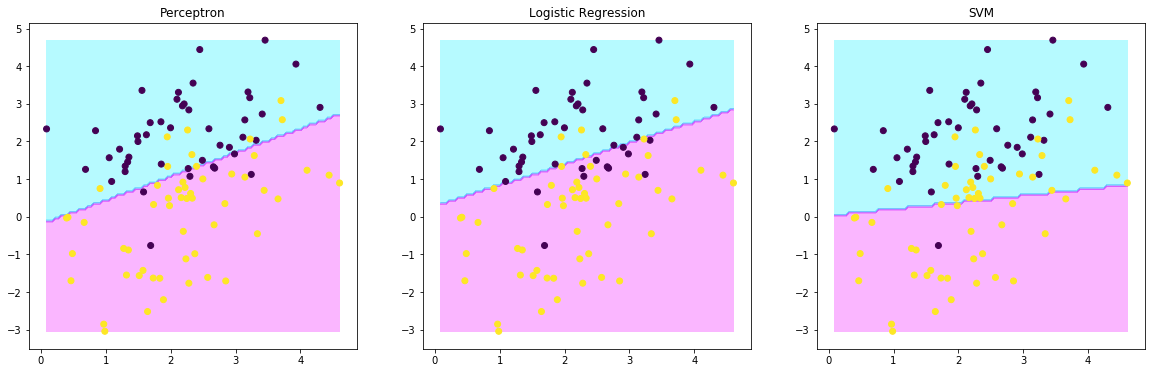

In [66]:
Xtrain,ytrain, Xtest, ytest = np.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
w_perceptron = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_perceptron, jac=regressionGradient, args=args,method='CG', options=opts)
w_perceptron = np.transpose(np.array(soln.x))

w_logistic = np.zeros((Xtrain_i.shape[1],1))
minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w_logistic = np.transpose(np.array(soln.x))
w_logistic = np.reshape(w,[len(w),1])

w_svm = trainSGDSVM(Xtrain_i,ytrain,100,0.01)
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
